In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
load_data = pd.read_csv("./Datasets/titanic_survivel.csv")

In [4]:
load_data.shape

(891, 12)

In [5]:
load_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# finding missing values in the dataset
load_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Handling the missing value
load_data = load_data.drop(columns='Cabin', axis=1)

In [9]:
load_data['Age'].fillna(load_data['Age'].mean(), inplace= True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12672\3411107948.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  load_data['Age'].fillna(load_data['Age'].mean(), inplace= True)


In [10]:
load_data['Embarked'].mode()[0]

'S'

In [11]:
load_data['Embarked'].fillna(load_data['Embarked'].mode()[0], inplace= True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12672\2629753365.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  load_data['Embarked'].fillna(load_data['Embarked'].mode()[0], inplace= True)


In [12]:
load_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

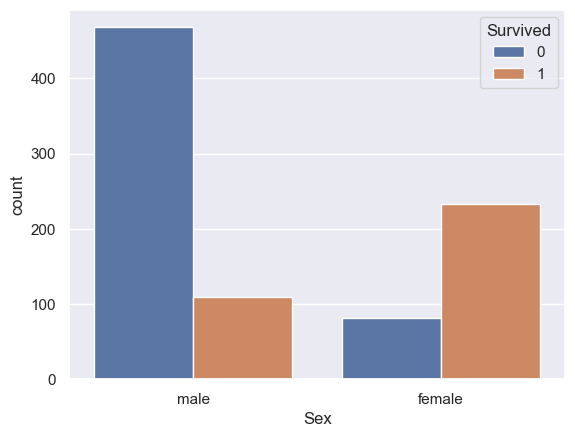

In [13]:
sns.set_theme()
sns.countplot(x='Sex',  hue='Survived' , data = load_data)

<Axes: xlabel='Pclass', ylabel='count'>

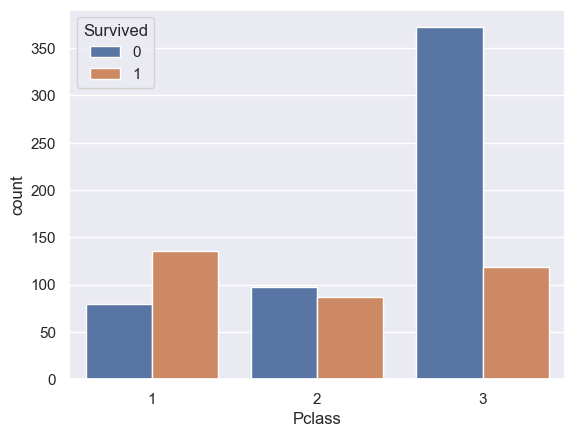

In [14]:
sns.countplot(x='Pclass',  hue='Survived' , data = load_data)

<Axes: xlabel='Parch', ylabel='count'>

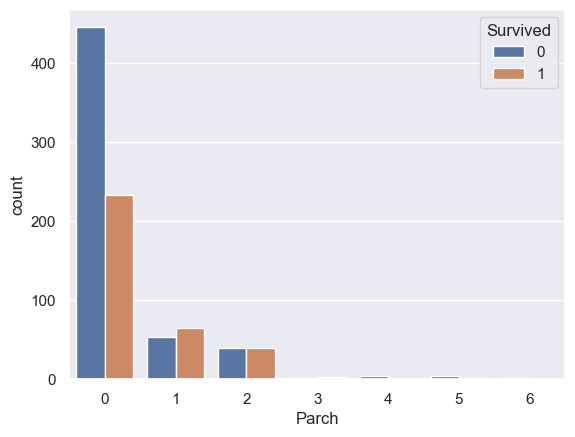

In [15]:
sns.countplot(x='Parch',  hue='Survived' , data = load_data)

In [16]:
load_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [17]:
load_data.replace( {
                   'Sex' : {'male' : 0, 'female' : 1}, 
                   'Embarked' : {'S' : 1, 'C' : 2, 'Q' : 3}
                     }, inplace= True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12672\1721083813.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  load_data.replace( {


In [18]:
load_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,1


In [19]:
X = load_data.drop(columns=['Name', 'Ticket', 'Survived','PassengerId'], axis=1)
y = load_data['Survived']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [21]:
model = LogisticRegression()

In [22]:
model.fit(X_train, y_train)

c:\Users\Admin\OneDrive\Desktop\GitHub\ML-Projects\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
predection_train_data = model.predict(X_train)
accuracy_train_data = accuracy_score(y_train, predection_train_data)
print("Accuracy on training data : ", accuracy_train_data)

Accuracy on training data :  0.8019662921348315


In [24]:
predection_test_data = model.predict(X_test)
accuracy_test_data = accuracy_score(y_test, predection_test_data)
print("Accuracy on test data : ", accuracy_test_data)

Accuracy on test data :  0.7988826815642458
